In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


Будем предсказывать наличие медалей по национальности, возрасту, росту, весу, полу и виду спорта (айди и имя уберем, т.к. они не будут влиять на результат)

In [73]:
def medals(row):
    if row['gold'] + row['silver'] + row['bronze'] > 0:
        return 1
    return 0

def dob_to_year(param):
    return int(param[-2:])

In [74]:
data['medals'] = data.apply(medals, axis=1)
df = data.drop(['gold', 'silver', 'bronze'], axis=1)

In [75]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,medals
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   medals       11538 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 811.4+ KB


In [77]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   medals       10858 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 848.3+ KB


In [78]:
X = df.drop(['id', 'name', 'medals'], axis=1)
Y = df['medals']

In [79]:
sex_replace = {'male': 0, 'female': 1}
X = X.replace(sex_replace)
X = pd.get_dummies(X, columns=['nationality'])
X = pd.get_dummies(X, columns=['sport'])

In [80]:
X['dob'] = X['dob'].apply(dob_to_year)
X.head()

,sex,dob,height,weight,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,0,69,1.72,64.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,86,1.68,56.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,92,1.98,79.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,91,1.83,80.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,90,1.81,71.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [96]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 6)
model.fit(X_train, Y_train)
predictions_prob = model.predict_proba(X_test)

c:\Users\Maria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
Y_pr = model.predict(X_train)

In [98]:
model.score(X_train, Y_train)

0.8411236472484458

# ROC-curve 

## Без использования встроенного метода

Массив пороговых значений

In [99]:
THRES = np.linspace(0.05, 0.95, 100)

Расчет элементов матрицы ошибок для разных пороговых значений 

In [100]:
TP = []
FP = []
TN = []
FN = []

for thres in THRES:
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for prediction_prob, actual in zip(predictions_prob[:, 1], Y_test):
        if prediction_prob > thres:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 0:
                tn += 1
            else:
                fn += 1
    TP.append(tp)
    FP.append(fp)
    TN.append(tn)
    FN.append(fn)

In [101]:
TP = np.array(TP)
FP = np.array(FP)
TN = np.array(TN)
FN = np.array(FN)

Расчет TPR и FPR

In [102]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

## С использованием встроенных методов

In [103]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve( Y_test, predictions_prob[:, 1] )

## Сравнение графиков 

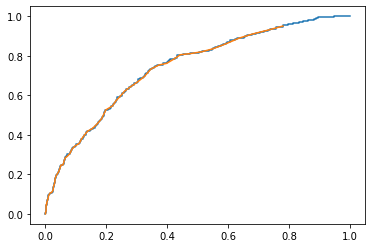

In [104]:
plt.plot(fpr, tpr)
plt.plot(FPR, TPR)

=> графики совпадают

# PR curve

In [105]:
PR = TP / (TP + FP)
REC = TPR

<ipython-input-105-c4b6240ae377>:1: RuntimeWarning: invalid value encountered in true_divide
  PR = TP / (TP + FP)


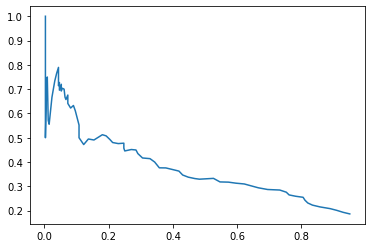

In [106]:
plt.plot(REC, PR)

In [107]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, predictions_prob[:,1])

0.3707612622905955